# A very short intro to exercise 1B.

The goal of this exercise is to merge the dataframe which we created (and pickled) in 1A with the PRIO dynamic variabels. Now, we have already added a temporal dimension to the PRIO grid and the static variabels. That enabled us to merge these two data sources with the UDCP data. As such, it should now be straight forward to add the dynamic variabels by merging on *year* and *gid*. However, Most of the dynamic variabels only comes in intervals of 5 or even 10 years (this will become clear below). Thus, we have a lot of missing data or observations here. Ameding this issue will be the main challange in this exercise.

Luckly, for many of these variabelse we can interpolate and/or extrapolated the missing values without too many assumptions. When I say interpolate I mean calculating values inbetween observation. For instance, say for some feature we have observations from 2000 and 2005, but also want values for the intermidiate years: 2001,2002,2003 and 2004. Well, we can use different kinds of interpolations to estimate and fill these values. 

By extrapolation I mean extending values beyond our observetion. For instance, say our last obvservation is 2013 and we also want values for 2014. Well, we can use extrapolate to optain values for years which we do not have values for. Notebly we can also back in years 'extrpolate' (this is a sloppy use of terminology given time series data. Here extrapolation usually implies "forward in time". we use the same term here disregarding the temporal direction). For instance, say we have a first observation from 1990 and we also want values for 1889. Well, we can also 'extrapolate' back in time and fill that observation as well. 

Now, If your alarm bells are ringing aloud, and you think that this interpolation/extrapolation business sounds a very ad hoc and quite imprudent you are on to something. Great thought and care should be taken before we start inferening missing data. In a practical senario great efforts should be made to get complete data from the source. For instance by checking where PRIO optained the data from, and try to get the data from that original source. If this is not possible, spend time assesing how and under what assumptions you balieve you can justify a potential interpolation/extrapolation. 

In this exercise, however, we will jump straight to interpolation/extrapolation. The reasons we do this is: 1) It is way more manageable to use features from PRIO compared to original scources. 2) Interpolation and extrapolation are topics you should get familiar with. 3) We will only here interpolate/extrapolate features which are reletivly stable across time. Thus, since the values do not change much across time for, one given cell, we do not assume a lot by using temporal adjacent values to compute missing values. Still, note that this is an risky thing to do and you should never do it thoughtlessly. 

With that out of the way, here are some formalities:

> Other than code and explanations, there is also some questions below. These will be written in **bold**. Often there is no one-right-answer, instead the questions are opportunities for you to ponder about what we are doing and what we see in the data. Please write down your answer/thoughts directly under the question (prefereble in the same markdown cell). It will be evaluated by your peers and might inspire them.


# 1B.0 Loading the dynamic variables:

First of all, you should import pandas (as pd), geopandas (as gpd) and load the dynamic PRIO variabels (prio_dynamic). Use your code from 1A (copy-paste or rewrite).


In [2]:
prio_dynamic = 

Run whatever checks you feel are necessary to asses that the data is as it should be (shape, info, columns, head, tail, sample, type, one or more plots, etc..)

(1685268, 61)

Index(['gid', 'year', 'agri_ih', 'barren_ih', 'bdist1', 'bdist2', 'bdist3',
       'capdist', 'diamsec_y', 'diamprim_y', 'droughtcrop_speibase',
       'droughtcrop_speigdm', 'droughtcrop_spi', 'droughtend_speibase',
       'droughtend_speigdm', 'droughtend_spi', 'droughtstart_speibase',
       'droughtstart_speigdm', 'droughtstart_spi', 'droughtyr_speibase',
       'droughtyr_speigdm', 'droughtyr_spi', 'drug_y', 'excluded', 'forest_ih',
       'gcp_mer', 'gcp_ppp', 'gcp_qual', 'gem_y', 'goldplacer_y', 'goldvein_y',
       'goldsurface_y', 'grass_ih', 'gwarea', 'gwno', 'irrig_max', 'irrig_min',
       'irrig_sd', 'irrig_sum', 'nlights_calib_mean', 'nlights_max',
       'nlights_mean', 'nlights_min', 'nlights_sd', 'pasture_ih',
       'petroleum_y', 'pop_gpw_max', 'pop_gpw_min', 'pop_gpw_sd',
       'pop_gpw_sum', 'pop_hyd_max', 'pop_hyd_min', 'pop_hyd_sd',
       'pop_hyd_sum', 'prec_gpcc', 'prec_gpcp', 'savanna_ih', 'shrub_ih',
       'temp', 'urban_ih', 'water_ih'],
      dtype='obje

Check the unique years:

In [5]:
years = sorted(prio_dynamic['...'].unique())
print(...)

[1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


As seen we only have data through 2014 - and this is only for some features. For others features, the last observation is 2010 or even 2005. That is far behind the UCDP data where the last observation is 2019. In practice this is a pretty important point and we shall return to it later. For now, however, we will not worry about it. indeed we will only try to exrapolate the dynamic PRIO data as far as 2014 (for the features which a missing one or more years in the end). The futher out into the furture we extrapolate data the more imprudent the approach becomes - even if our features are relativly stable across time.

Lets try to visualize some feautes for som cells and asses whar is there and what is missing. Lest make a list \[\] of the following features:

- nlights_mean
- pop_gpw_sum
- agri_ih
- barren_ih
- urban_ih
- petroleum_y
- excluded 


In [6]:
features_of_interest = 

We concentrate on these features for two reasons: 1) There are more or less clear theoritical justification for thinking these features might have some prediction power regarding conflict. 2) They are all rather stable across time - except perhaps nlights_mean, but here we have most of the observations anyway.

**Can you mention some theoritical resons why some of these features might related to conflict? Please draw from your past studies, your intuition or the curriculum. References are nice to have, not need to have here.**

Now, if we want to visualize anything we first want to import matplotlib.pyplot as plt. We will also use numpy a bit, so please also import numpy as np.

From now on I will denote the cells '*gids*' since that is the cell id in the datasets. So, lets take a random sample of 10 gids ('gid'). We can use these for checking and testing.  

In [8]:
random_gids = list(prio_dynamic['...'].sample(..., random_state = 66)) # random state so you'll get the same 'random' sample each time.

Print out you random_gids

In [9]:
print(...)

[209039, 127307, 243564, 239892, 182082, 223856, 212750, 81290, 217943, 167499]


Now, lets create a plot for each feature of interest. In each of our plots we want our 10 random gids. Thus we create a for-loop in a for-loop. The first loop will iterate over our features. The second loop will iterate over the gids. No need to change any code i you don't want to. The go thorugh it and run it.

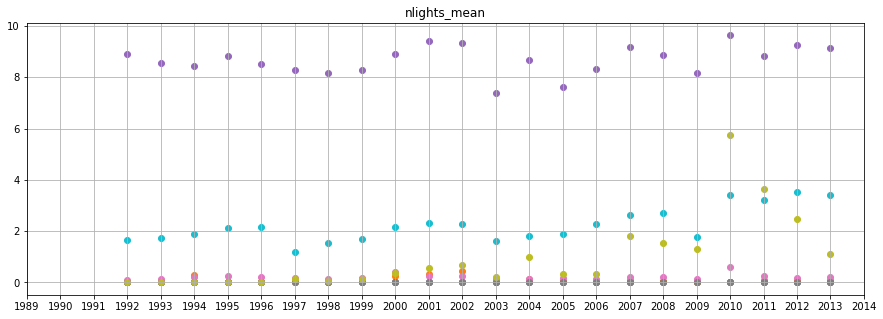

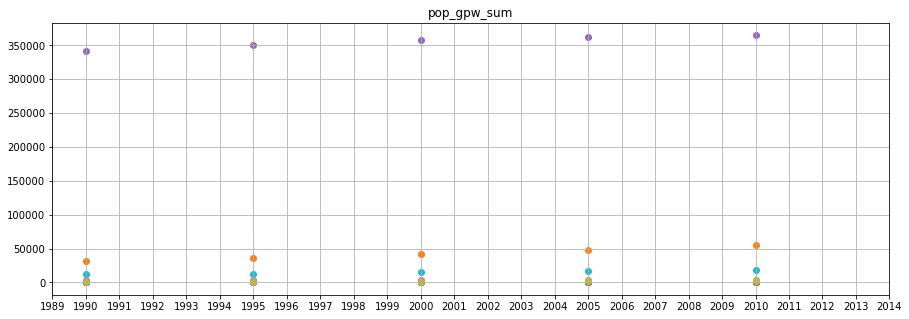

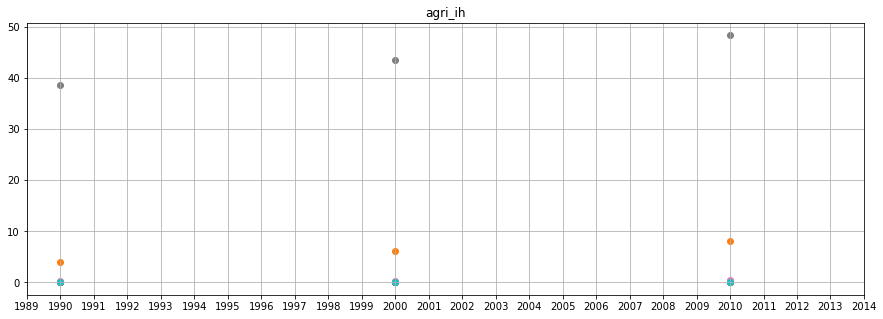

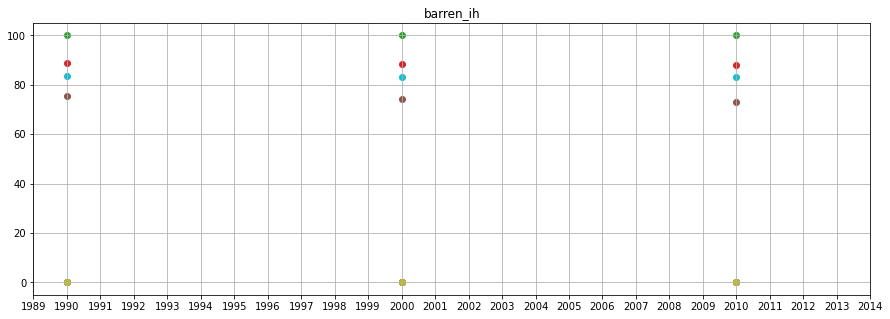

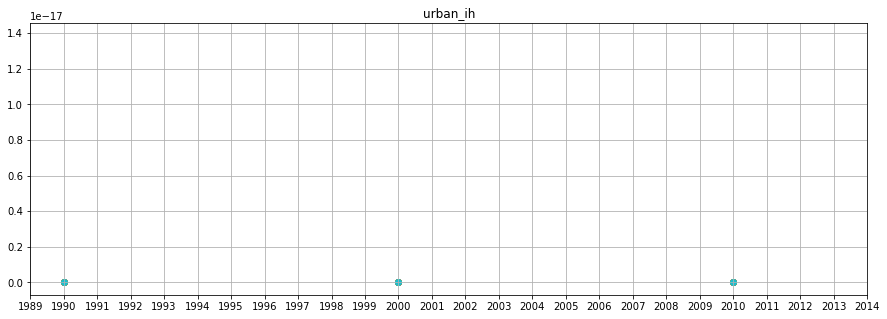

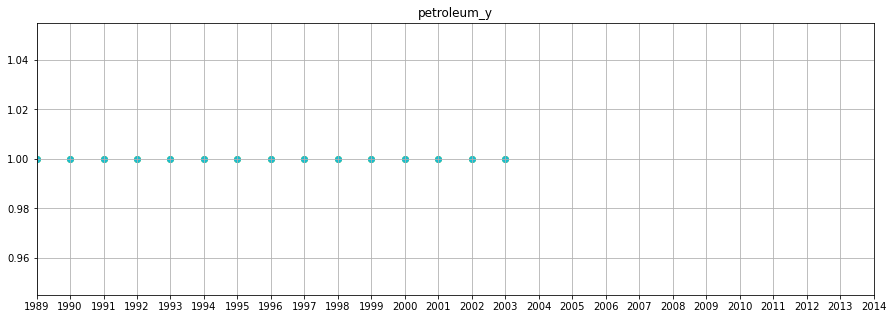

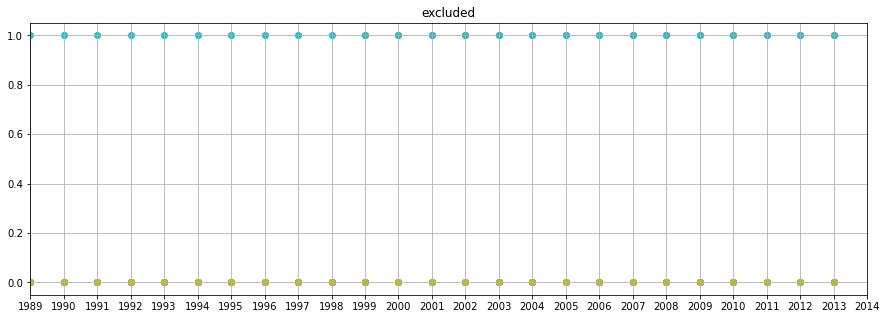

In [10]:
for feature in features_of_interest: 
    
    plt.figure(figsize=[15,5]) # the size of our plots
    plt.title(feature) # the title of our plots depands on which feature we are currently looping over
    
    for gid in random_gids:
        
        plt.xlim(prio_dynamic['year'].min(), prio_dynamic['year'].max()) # this insures our x-axis covers all years so we can easier asses if velues are missing in either end
        plt.xticks(years) # we want a tick on the x-axis for each year 
        
        plt.scatter(data = prio_dynamic[prio_dynamic['gid']==gid], y = feature, x = 'year' )# the scatter. This time we first specify the data, then the y from said data, then the x.
        # This is a bit different from how we used the scatter last week so take some time to understand the diference
    plt.grid() # put a grid on the current plot
    plt.show() # Render the plot we are currently looping over

Clealy, most of these plots look pretty half-baked. No worries, that was expected. The reason they look a bit deserted is that they all miss observations for one or more years. Some features miss the first and/or last years - and some features have large gaps of 5 or even 10 years between observations. Encouragingly, we can also see that these features appear to be rather stable across time, within the different cells - that is, there are a lot of variation between cells, but over acorss years a given cell does not vary too much (maybe except night light, but luckly only very few years are missing here). 

Naturally this is just eyeballing - a lot of more rigorous checks and tests could be made to strengthen such claims and assumption. For now, however, our eyeballing test will do just fine.

As you might suspect, we could use a lot of different tools and methods to interpolate/extrapolate the missing values. What we are gonna do is very basic. What is important here is that you realize that this is actually an esimation taks. As such we could use kinds of sophisticated machine learning algoritmes to solve. Let look at some interpolation in action, and we can return to the topic of more advanced solutions afterwards.

# 1B.1

We will use the scipy to interpolate so import scipy.interpolate

Scipy is a very useful library for a lot of stuff. Feel free to explore the documentation https://docs.scipy.org/doc/scipy/reference/. For now, however we are just gonna use scipy's interpolation capabilities.

Given a set of corrosponding x's and y's scipy.interpolate can create a function. This functions connects all our data points. If we now want to know the values of some y given a new x,  we can introduce new x's and get new y values. naturally this new x value could corrospond the a missing value - in wich case the interpolated y might serve as substitute for said missing value(s).

Note that we are not trying to fit a complete line or pattern here (e.g. a liniar regression). We just want to connect the dots. Of course thes dots can be connected in more or less complecated ways, but we will just start with linear interpolation. That is drawing striaght linse between our observations. For simplicity we will generate some data ourself to do a bit of initial testing. Afterwards, we'll move on to the real deal. 

Create two numpy arrays:

`x= np.array([0,5,10])`  
`y= np.array([1,6,3])`
 
 And plot the points with a connecting line. 

x = [ 0  5 10] 
 y= [1 6 3]


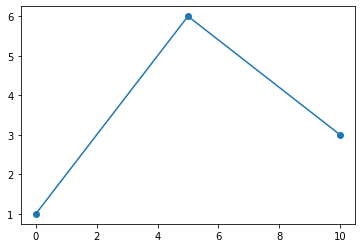

In [12]:
x= 
y= 

print(f'x = {x} \n y= {y}') # prints the x and y. The f in front lets us put variabels inside the brackets of the string. the \n is a 'new line' indicator.

plt.plot(...,..., '-o') # x first, then y. The '-o' is a handy shortcut for "give me a line (-) with dots (o) on it".
plt.show()

Now say that we belive this is how the line/funciton should actually look. Futhermore, say we now want know (interpolate) the value y for x = 2. We can use the scipy.interpolate here. Scipy offers many different interpolation strategies, but as mentioned we'll just use linear interpolation for now: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html. See more options here https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html.

Create the interpolation function by inserting x (first parameter) and y (second aprameter) to the cell below

In [13]:
interpolationFunction = scipy.interpolate.interp1d(..., ..., bounds_error = False) # don't worry about the the bounds_error = False

We can now introduce a new x, and get the corresponding y. Try a value between 1 and 9 (not 5, we already have that)

In [14]:
interpolationFunction(...)

array(3.)

Insted of a single number/scalar, we can also introduce a list (or array if we want to) of new x's. Create a list \[...\], with two or three values between 1 and 9 (not 5). Put that list into the interpolation function and print the output (inter_y).

In [15]:
new_x = [...,...]
inter_y = interpolationFunction(...)
print(...)

[3.  4.2]


Lets plot your interpolations for clarity. In the first plot give x and y as parameters. In the second plot give new_x and inter_y as parameters

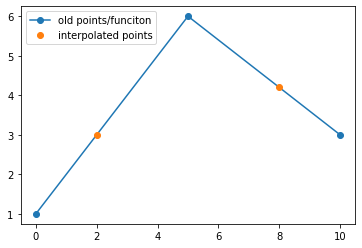

In [16]:
plt.plot(..., ..., '-o', label = 'old points/funciton') # x, y
plt.plot(..., ..., 'o', label = 'interpolated points') # new_x, inter_y

plt.legend()
plt.show()

It might be easier (if more computational expensive) to just interpolate all relevant values of y. Lets say that would be all y's for $x \in (0:10)$ (That is x's from 0 through 10). Use np.arrange to get an array of x's from 0 to 10 with steps of 1.

`new_x = np.arange(0,11,1)`

**(side quest: why do I wirte 0,11,1 when I want values from o to 10?)**

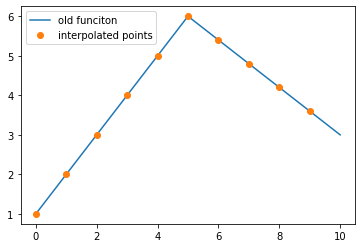

In [17]:
new_x = 
inter_y = interpolationFunction(...)

plt.plot(..., ..., '-', label = 'old funciton') # x and y as parameters
plt.plot(..., ..., 'o', label = 'interpolated points') # new_x and inter_y as parameters

plt.legend()
plt.show()


Very handy indeed - but also super imprudent. We impose a lot of assumption about the funcitonal form here given very little data. But some times we have more data, and perhaps the trends appears rather stable and/or simple. Perhaps then, we are able to justify such approach.

As mentioned scipy doese have a other, more advanced, interpolation options. Some which might be more appropiate given the nature or pattern of our data. As an exmeple we can use a cubis function below (as oppose to linear). Interpolate over x and y, but this time, in the scipy interpolation, set *kind* to *'cubic'*:

`kind = 'cubic'`


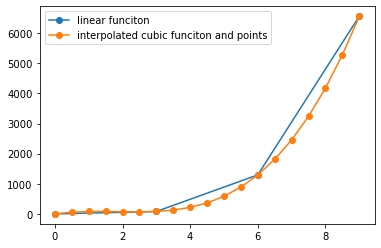

In [18]:
x = np.arange(0,10,3)
y = x**4

interpolationFunction = scipy.interpolate.interp1d(x, y, kind = '...', bounds_error = False) # don't worry about the the bounds_error = False

new_x = np.arange(0,10,0.5)
inter_y = interpolationFunction(new_x)

plt.plot(x,y, '-o', label = 'linear funciton')
plt.plot(new_x,inter_y, '-o', label = 'interpolated cubic funciton and points')

plt.legend()

plt.show()


Who knows? We might have good reason/theory which justifies a cubic function over a linaer. Agian we are assuming a lot here. And sometimes the simplest solutions is the one with fewest assumptions. At least, the solution with the fewest assumptions is allways most prudent.

Of course, we might lessen the number of assumptions involved if we estimated a functional form instead of choosing it apriori from some library. That is, we could estimate the functional form using machine learning instead of theory/assumptions/gut feelings. One tool of great potential here is Gaussian Processe. This appraoch can be super useful for interpolation/extrapolation, but it is also a bit to advance to introduce right now. We will talk a bit aboout GPs later in the course, but if you are curious check out: http://www.gaussianprocess.org/gpml/

Speaking of extrapolation, we shall not do anything fancy here. Below we will just extent our last observation to the end of yours years and extent our first observation to the first year. Again, we only do this lightly because this is a learning environment and the trend appear pretty stable. You can see more about the way we do it here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


Now lets return to our actual data and run a small test before running through it all.

# 1B.2

First, lets sort our dataset according to year. The whole thing about working with trends on slices of data and  merging things back together requires some overview and caution. Sorting our data according to 'year' is a good first step. 

In [19]:
prio_dynamic.sort_values('...', inplace = True)

You do not have to input anything into the code below but feel free to change it, optimize it or put it in a function (which I would highly recommend, if you have the know-how). No matter what, you should take your time to go through it and try to understand it. Maybe write your own comments and so on.

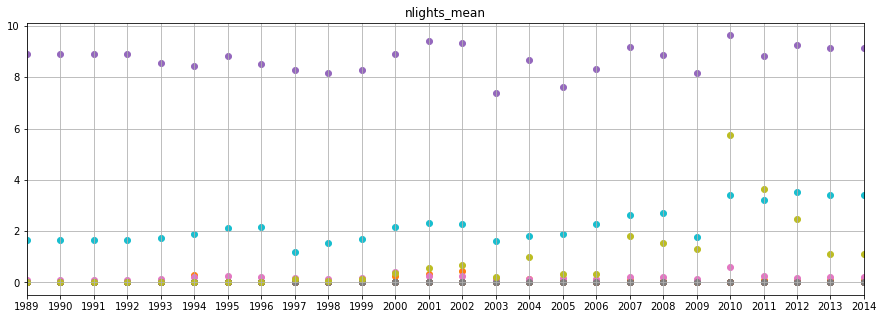

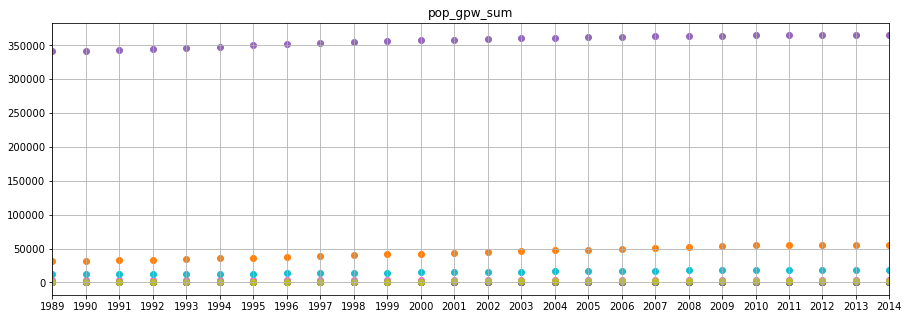

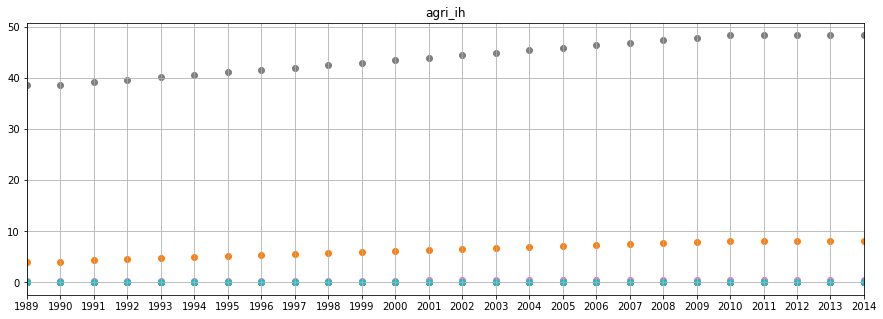

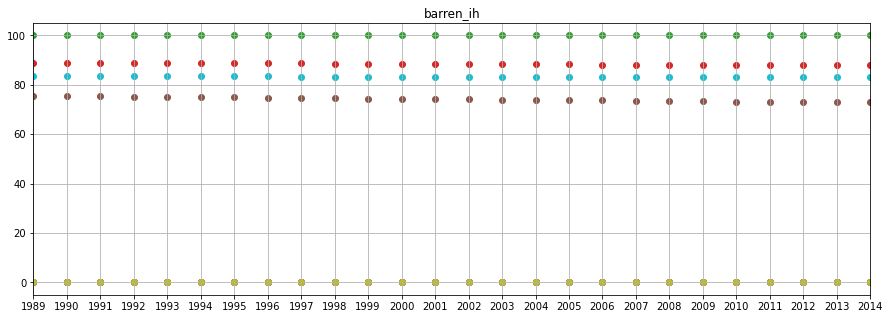

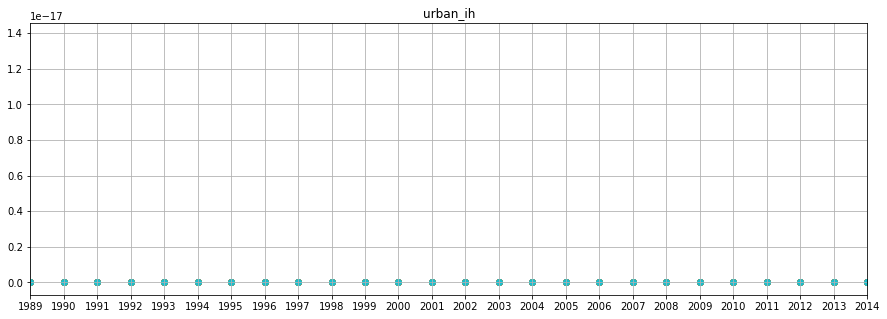

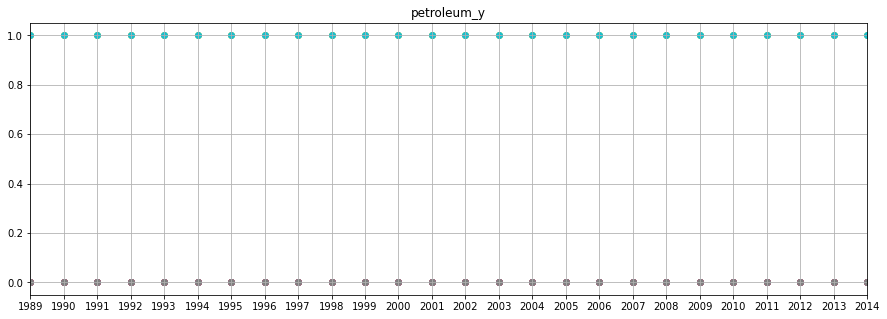

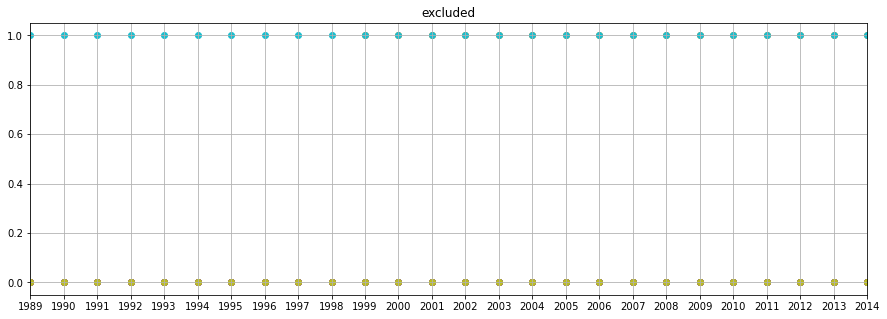

In [20]:
years = prio_dynamic['year'].unique() # this is the full set of years we want values for
all_gids = prio_dynamic['gid'].unique()
n_gids = len(all_gids)
n_features = len(features_of_interest)

for j, feature in enumerate(features_of_interest):
    
    plt.figure(figsize=[15,5])
    plt.title(feature)
    
    plt.xlim(prio_dynamic['year'].min(), prio_dynamic['year'].max())
    plt.xticks(years)

    plt.grid()
    
    for i, gid in enumerate(random_gids): # correct to all gids


        print(f'processing feature {j+1}/{n_features} : gid {i+1}/{n_gids}', end='\r') # need some blank space at the end
        
        # We create a small slice of our dataset with only the actual opservations + corrospoding years
        observations = prio_dynamic[prio_dynamic['gid']==gid][[feature,'year']].dropna()

        
        # This is simply for transparency. X is years and y is the feature j
        X = observations.iloc[:,1]
        y = observations.iloc[:,0]
        
        # Now, if there is not any value in X at all (that is they where all nas, and has as such been dropped), then we simply fill it wit zeros and set the full year list as years (justify why)
        if X.isnull().values.all():
            X = years
            y = np.zeros(len(years))
        
        # If there are some values in the feature j, the we create en interpolation function and interpolate intermidiate values for all our years
        else:
            interpolationFunction = scipy.interpolate.interp1d(X, y, bounds_error = False)
            y = interpolationFunction(years) 
        
        
        temp_df =  pd.DataFrame([y, years]).T.fillna(method='ffill').fillna(method='bfill') # extrapolations forward and backward
        
        plt.scatter(temp_df[1], temp_df[0])
        
    plt.show()
        

Seems to work! Lets move on to the full set of gids.

# 1B.3
Now we are gonna run over all features and all gids. again, you don't have to do anything to the code. You could (and maybe should) put it into a function. The important thing, however, is that you take your time to go through it and try to understand what it does.

**Note that the operation below will take hours to complete!** Maybe a full night. So go read the curriculum or have a life or something. Just be sure you pickle and save the outputted dataframe as soon as it is done and you are able. We don't want to wait for this function to run more times then we have to. The prudent thing would be to just run the pickle cells below as soon as you have started the operation. Then they should execute automatically as soon as the operation is done. But still.. Double tap. 

(Sidenote: it is possible to do this much faster. First of all, this operation can quite easy be done on multiply cores https://docs.python.org/2/library/multiprocessing.html. Depending on you computer, this can be order of magnitudes faster. For those of you used to R or are very used to data handling, there is also a way where you turn the data set from *long* to *wide* and do each feature in one sweep. That is, you might omit the gid loop. if that does not make sense don't worry. The point is that there are faster options - however, the operation below appeared a pedagogical compromise.)

In [21]:
import time # used to asses how much time the operation took, when you are done.

In [ ]:
years = prio_dynamic['year'].unique() # this is the full set of years we want values for
all_gids = prio_dynamic['gid'].unique()
n_gids = len(all_gids)
n_features = len(features_of_interest)

time_start = time.time()

for j, feature in enumerate(features_of_interest):
            
    for i, gid in enumerate(all_gids):


        print(f'processing feature ({feature}) {j+1}/{n_features} : gid ({gid}) {i+1}/{n_gids}........', end='\r') 
        
        # We create a small slice of our dataset with only the actual opservations + corrospoding years
        observations = prio_dynamic[prio_dynamic['gid']==gid][[feature,'year']].dropna()

        
        # This is simply for transparency. X is years and y is the feature j
        X = observations.iloc[:,1]
        y = observations.iloc[:,0]
                
        try: # a try/except statment. So the operation will try to interpolate, but is there is an error we will move on the the except part.
            interpolationFunction = scipy.interpolate.interp1d(X, y, bounds_error = False)
            y = interpolationFunction(years) 
        
        except:
            X = years
            y = np.zeros(len(years))
                #If we get an interpolation error (e.g. none or only one obs) we just send them pass interpolation and set them to zero.
                # Most gid in these features wich do not have any obs at all a very remote cell. So zero will be fine. 
                # Regarding cells with only one obs (can't interpolate with one obs) we only have a couple in 'excluded' so we'll be fine just setting it to zero.
                # Note the the try/except statement makes a function very robust, but it is also a bit imprundent. Better solve you problems, then just look away. If possible
    
        temp_df =  pd.DataFrame([y, years]).T.fillna(method='ffill').fillna(method='bfill')# ffill fills forward from lat obs. Then bfill fill backwards from first obs
        
        # We create a new name for our interpolated feature. We could overwrite the old feature, but this seems more prudent (we can make some checks)
        new_feature_name = 'interp_' + feature
        
        # And now, we insert this new feature into the old dataset - at the right spot! 
        observations_index = prio_dynamic[prio_dynamic['gid'] == gid].index
        prio_dynamic.loc[observations_index,new_feature_name] = temp_df[0].values

        
print('\nALL DONE!')
time_end = time.time()
minutes_run = round((time_end-time_start)/60, 2)
print(f'{minutes_run} minutes to complete')

**Now, hurry up and pickle the prio_dynamic** before your computer decides to do somthing despicable like shutdown or freeze. **(no need to add any code below, just hurry up and run the next two cells)**

In [ ]:
import pickle

In [ ]:
file_name = "interpolated_dynamics.pkl"
output = open(file_name, 'wb')
pickle.dump(prio_dynamic, output)
output.close()

# 1B.4

So, if you managed to pickle your file correctly, and your computer dies or you need to shutdown for some life-related reason: **This is your 'savepoint'. Don't bother running the code above is you already have the "interpolated_dynamics.pkl!"**. Normally I would also just stop a script here and open a new one.

So either you can keep going or load your pickle "interpolated_dynamics.pkl" if your computer needed a break.

In [ ]:
# pkl_file = open('interpolated_dynamics.pkl', 'rb')
# prio_dynamic = pickle.load(pkl_file)
# pkl_file.close()

Lets just run a visual test with our random subset. Fill in the two (nested) for loops, so the first one loops over features in features_of_interest, and the second one loops over gid in random_gids (if you've just started from this "save point", you might need to create the 'years' object again. Just find the code above and put it in a cell just below this one)

In [ ]:
for ... in ...:
    
    new_feature_name = 'interp_' + feature # get the name of the new interpolated features
    
    plt.figure(figsize=[15,5])
    plt.title(new_feature_name)
    

    for ... in ...:

        
        plt.xlim(prio_dynamic['year'].min(), prio_dynamic['year'].max())
        plt.xticks(years)
        
        plt.scatter(data = prio_dynamic[prio_dynamic['gid']==gid], y = new_feature_name, x = 'year' )
        
    plt.grid()
    plt.show()

Is everything as it should be? If so, lets merge with the data we pickled in 1A.

# 1B.5

Import the pickle you made at the very end of 1A. You can go back and check the code you used there for guidance.

In [ ]:
pkl_file = 
grid_ucdp =
pkl_file.close()

Now, merge grid_ucdp (first parameter) with prio_dynamic (second parameter) via left, and on 'gid' and 'year'.

In [ ]:
full_df =  pd.merge(..., ..., how = '...', on = ['...', '...'])

Pickle the full_df

In [ ]:
file_name = "full_df.pkl"
output = open(file_name, 'wb')
pickle.dump(..., output)
output.close()

We can try a spatial plot of a feature from the dynamic data. lets go over all the years so we can see our interpolations. Use 'interp_pop_gpw_sum'

In [ ]:
for i in years:
    print(f'year{i}')
    grid_static_yearly[grid_static_yearly['year'] == i].plot(column='...', figsize=(15, 15))
    plt.show()

Now, we will drop a lot of features to make our (for now) final df. We will only work with a few selected going forward but you can always load your "full df" if you want somthing else and interpolte relevant values.

Note that we take very few of the static features with us. Also note that we take a couple of dynamic features with us which we did not interpolate/extrapolate, e.g. bdist2. This is simply because all observations were present here from the get go.

No code to change here btw:

In [ ]:
final_df = full_df[['gid', 'gwno', 'gwarea', 'year','interp_pop_gpw_sum',
                    'interp_excluded', 'nlights_mean', 'interp_agri_ih', 
                    'interp_barren_ih', 'interp_urban_ih', 'interp_petroleum_y', 
                    'mountains_mean', 'ttime_mean', 'bdist2', 'geometry']]

So, you might think that we are left with rather few features. This is true compared to what we started with. However, we will soon start to do *feature engineering* and that will create a lot of new features. Point being, this set is plenty large for now. 

**For some of the features which we have not yet discussed - e.g. mountains_mean, bdist2 - what theoretical justificaion can you give for including these in the final set?**

Now, feel free to asses it with your favorite tools (shape, sample, etc..)

Seem good? then lets pickle our "final" (well for now) dataframe final_df and name it final_df.pkl

In [ ]:
file_name = "..."
output = open(file_name, 'wb')
pickle.dump(..., output)
output.close()

And why not a small pickle check (better safe than sorry). Load you final pickle: 

In [ ]:
pkl_file = open('...', 'rb')
pickle_test = pickle.load(pkl_file)
pkl_file.close()

Test the pickle. Just on or two things like sample and info will do. Maybe make a plot

And done champ.